mpmath.sumem(f, interval, tol=None, reject=10, integral=None, adiffs=None, bdiffs=None, verbose=False, error=False, _fast_abort=False)

Uses the Euler-Maclaurin formula to compute an approximation accurate to within tol (which defaults to the present epsilon) of the sum

In [1]:
def test_mpmath_sumem(f, a, b = None):
    # https://mpmath.org/doc/current/calculus/sums_limits.html
    from mpmath import sumem, mp
    mp.dps = 50; mp.pretty = True
    if None == b:
        b = mp.inf
    return sumem(f, [a, b])

In [2]:
fn = 1/x^2
f = lambda x: 1/x^2
a = 1 #https://en.wikipedia.org/wiki/Basel_problem
p = 4

In [3]:
test_mpmath_sumem(f, 2) - test_mpmath_sumem(f, 3)

0.24985622564069066126679295403575238966185468243081

In [4]:
test_mpmath_sumem(f, a)

1.6333333333333333333333333333333333333333333333333

In [5]:
#I = mpf(1)/a
#I

$${\displaystyle \sum _{i=a}^{b}f(i)=\int _{a}^{b}f(x)\,dx+{\frac {f(a)+f(b)}{2}}+\sum _{k=1}^{\lfloor p/2\rfloor }{\frac {B_{2k}}{(2k)!}}(f^{(2k-1)}(b)-f^{(2k-1)}(a))+R_{p},}$$

$${\displaystyle P_{k}(x)=B_{k}(x-\lfloor x\rfloor ),}$$

$${\displaystyle R_{p}=(-1)^{p+1}\int _{a}^{b}f^{(p)}(x){\frac {P_{p}(x)}{p!}}\,dx.}$$

In [6]:
[k for k in range(1,1+p/2)]

[1, 2]

In [7]:
D = adiffs=((-1)**n*fac(k+1)*a**(-2-k) for k in range(1,1+p/2))
D

<generator object <genexpr> at 0x7f0d36a322e0>

In [8]:
# array of derivatives dfdn of different degree in the point a 
dfdx = [fn.diff(x,k) for k in range(1,1+p/2)]
dfdx

[-2/x^3, 6/x^4]

In [9]:
# array of derivatives dfdn of different degree in the point a 
dfdx_a = [(fn.diff(x,k)).subs(x == a) for k in range(1,1+p/2)]
dfdx_a

[-2, 6]

In [10]:
# array of derivatives dfdn of different degree in the point a 
#dfdx_a = [(-1)^n*fac(n+1)*a^(-2-n) for n in range(999)]
#dfdx_a

In [11]:
# array of derivatives dfdn of different degree in the point b 
#dfdx_b = [(-1)^n*fac(n+1)*b^(-2-n) for n in range(999)]
#dfdx_b

In [12]:
dfdx_a[0]

-2

$${\frac {B_{2k}}{(2k)!}}(f^{(2k-1)}(a))$$

$$\sum _{k=1}^{\lfloor p/2\rfloor }{\frac {B_{2k}}{(2k)!}}(f^{(2k-1)}(a))$$

In [13]:
[2*k-1 for k in range(1,1+p/2)]

[1, 3]

In [14]:
[(fn.diff(x,2*k-1)).subs(x == a)*(bernoulli(2*k)/factorial(2*k)) for k in range(1,1+p/2)]

[-1/6, 1/30]

In [15]:
sum_dfdx_a_bernoullis = sum([(fn.diff(x,2*k-1)).subs(x == a)*(bernoulli(2*k)/factorial(2*k)) for k in range(1,1+p/2)])
sum_dfdx_a_bernoullis

-2/15

In [16]:
#sumem(f, [a, inf], integral=I, adiffs=D)

In [17]:
integral(fn, x)

-1/x

In [18]:
- integral(fn, x).subs(x == a)

1

In [19]:
#integrate(1/x^2, (x, a, b))
#int_f = (-1/b)-(-1/a)
int_f = - integral(fn, x).subs(x == a)
int_f

1

In [20]:
(1/a).n()

1.00000000000000

In [21]:
f(a)

1

In [22]:
#f(b)

In [23]:
#(f(a)+f(b))/2

In [24]:
#int_f+(f(a)+f(b))/2

In [25]:
sum_dfdx_a_bernoullis = lambda _p : sum([(fn.diff(x,2*k-1)).subs(x == a)*(bernoulli(2*k)/factorial(2*k)) for k in range(1,1+_p/2)])

In [26]:
sum_dfdx_a_bernoullis(p)

-2/15

In [27]:
#sumem(f, [a, b]) - (int_f+(f(a)+f(b))/2)

In [28]:
for pp in range(3,p):
    print(pp, test_mpmath_sumem(f, a) - (int_f+(f(a))/2)-sum_dfdx_a_bernoullis(2*pp))

3 0.29047619047619047619047619047619047619047619047619


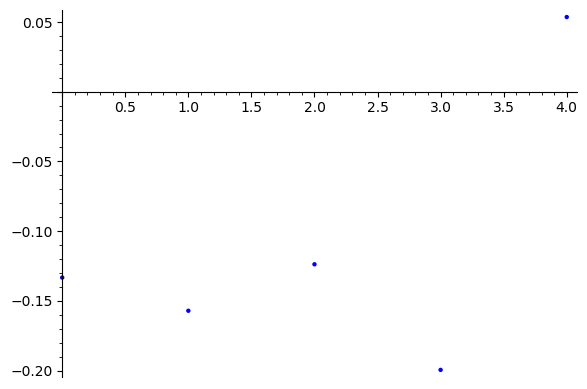

In [29]:
list_plot([sum_dfdx_a_bernoullis(2*pp) for pp in range(2,7)])

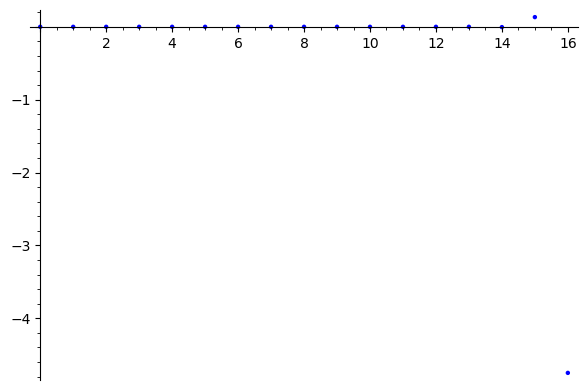

In [30]:
list_plot([sum_dfdx_a_bernoullis(2*pp) for pp in range(3,20)])

In [31]:
#list_plot([sum_dfdx_a_bernoullis(2*pp) for pp in range(3,600)])

In [32]:
test_mpmath_sumem(f, a) - (int_f)

0.63333333333333333333333333333333333333333333333333

In [33]:
sum([(-1)^n*factorial(n+1)*a^(-2-n)*(bernoulli(2*n)/factorial(2*n)) for n in range(p)])

2077/2520

In [34]:
P = lambda x, _p : bernoulli_polynomial(x - floor(x), _p)
B = lambda x, _p : bernoulli_polynomial(x, _p)

In [35]:
P(3.1, 5)

-0.0152400000000000

In [36]:
B(0.1, 5)

-0.0152400000000000

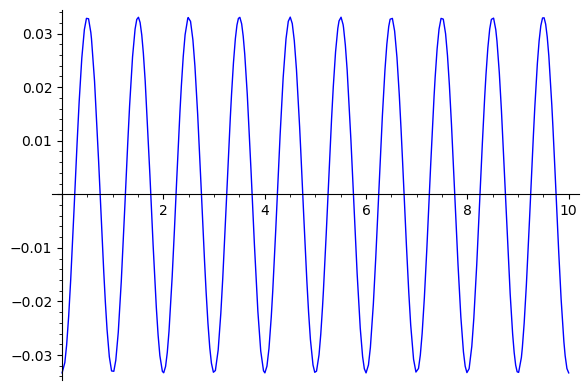

In [37]:
plot(P(x, 8), x, 0, 10)

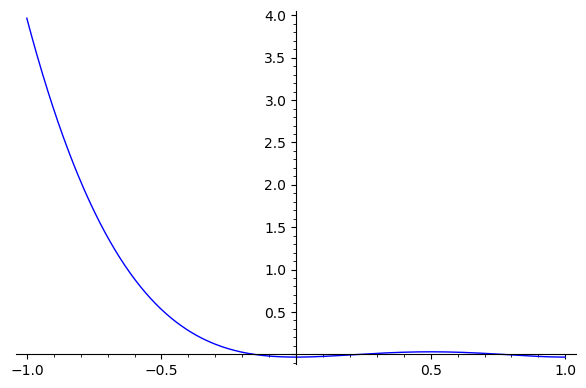

In [38]:
plot(bernoulli_polynomial(x, p))

$${\displaystyle R_{p}=(-1)^{p+1}\int _{a}^{b}f^{(p)}(x){\frac {P_{p}(x)}{p!}}\,dx.}$$

In [39]:
int_R_p = (-1)^(p+1)*integral(fn.diff(x,p)*P(x,p)/factorial(p), x)
int_R_p

5/x - 5/x^2 + 5/3/x^3 - 1/30/x^5 - 1/6*integrate(-120*floor(x)/x^3 + 180*floor(x)^2/x^4 - 120*floor(x)^3/x^5 + 30*floor(x)^4/x^6 + 180*floor(x)/x^4 - 180*floor(x)^2/x^5 + 60*floor(x)^3/x^6 - 60*floor(x)/x^5 + 30*floor(x)^2/x^6, x)

In [40]:
from IPython.display import display, Math, Latex
display(Math(latex(int_R_p)))

<IPython.core.display.Math object>

$${\displaystyle R_{p}=(-1)^{p+1}\sum_{j=a}^{b-1} \int _{0}^{1}f^{(p)}(u+i){\frac {B_{p}(u)}{p!}}\,du.}$$

In [41]:
#(-1)^(p+1)*
u, j = var("u, j")
int_R_p_j = lambda u, j : integral(fn.diff(x,p).subs(x == u+j) * B(u,p)/factorial(p), u)
display(Math(latex(int_R_p_j(u, j))))

<IPython.core.display.Math object>

In [42]:
display(Math(latex(int_R_p_j(u, j).subs(u==0))))

<IPython.core.display.Math object>

In [43]:
display(Math(latex(int_R_p_j(u, j).subs(u==1))))

<IPython.core.display.Math object>

In [44]:
int_R_p = lambda j : (int_R_p_j(u, j).subs(u==1)-int_R_p_j(u, j).subs(u==0)).full_simplify()
display(Math(latex(int_R_p(j))))

<IPython.core.display.Math object>

In [45]:
display(Math(latex((int_R_p_j(u, j).subs(u==1)-int_R_p_j(u, j).subs(u==0)).full_simplify())))

<IPython.core.display.Math object>

In [46]:
display(Math(latex(int_R_p(j))))

<IPython.core.display.Math object>

In [47]:
display(Math(latex(int_R_p(1))))

<IPython.core.display.Math object>

In [48]:
display(Math(latex(int_R_p(2))))

<IPython.core.display.Math object>

In [49]:
display(Math(latex(int_R_p(3))))

<IPython.core.display.Math object>

In [50]:
R_p = (-1)^(p+1)*sum(int_R_p(j), j, a, Infinity)
R_p

1/6*pi^2 - 49/30

In [51]:
int_f+(f(a))/2-sum_dfdx_a_bernoullis(p)

49/30

In [52]:
(int_f+(f(a))/2-sum_dfdx_a_bernoullis(p)).n()

1.63333333333333

In [53]:
int_f+(f(a))/2-sum_dfdx_a_bernoullis(p)+R_p

1/6*pi^2

In [54]:
(int_f+(f(a))/2-sum_dfdx_a_bernoullis(p)+R_p).n()

1.64493406684823

In [55]:
test_mpmath_sumem(f, a)

1.6333333333333333333333333333333333333333333333333

In [56]:
def my_euler_maclaurin(fn,symb,a,b,p,calc_R_p=False):
    #sum_dfdx_a_bernoullis = lambda _a : sum([(fn.diff(x,k-1)).subs(x == _a)*(bernoulli(k)/factorial(k)) for k in range(1,1+p)])
    sum_dfdx_a_bernoullis = sum([(fn.diff(symb,k-1))*(bernoulli(k)/factorial(k)) for k in range(1,1+p)])
    u, j = var("u, j")
    assume(j>0)

    if True:
        B = lambda x, p : bernoulli_polynomial(x, p)
        fact = lambda n : factorial(n)
    else:
        B = function("B")(x,p)
        fact = function("fact")(n)

    if True == calc_R_p:
        #int_R_p_j = lambda u, j : integral(fn.diff(x,p).subs(x == u+j) * B(u,p)/factorial(p), u)
        #int_R_p = lambda j : (int_R_p_j(u, j).subs(u==1)-int_R_p_j(u, j).subs(u==0)).full_simplify()
        int_R_p = lambda j : integral(fn.diff(symb,p).subs(symb == u+j) * B(x=u,p=p)/fact(n=p), (u,0,1))
        R_p = (-1)^(p+1)*sum(int_R_p(j), j, a, b-1)
    int_fn_a_b = integral(fn, (x, a, b))
    s = int_fn_a_b + sum_dfdx_a_bernoullis.subs(symb == b) - sum_dfdx_a_bernoullis.subs(symb == a)
    if True == calc_R_p:
        s += R_p
    if True:
        print(int_fn_a_b)
        print(fn(x=a))
        print(fn(x=b))
        print(sum_dfdx_a_bernoullis.subs(symb == a))
        print(sum_dfdx_a_bernoullis.subs(symb == b))
        if True == calc_R_p:
            print("R_p", R_p)
        print("s", s)
    return s

In [57]:
my_euler_maclaurin(fn, x, a, Infinity, p, calc_R_p=True)

1
1
0
-19/30
0
R_p 1/6*pi^2 - 49/30
s 1/6*pi^2


1/6*pi^2

In [58]:
my_euler_maclaurin(fn, x, a, Infinity, p)

1
1
0
-19/30
0
s 49/30


49/30